In [185]:
import numpy as np
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import pickle
import cv2
import seaborn as sns
# from VPR_main import loadImg


In [186]:

# def GetMatchInds(ft_ref, ft_qry, type):
#     metric = 'cosine'
#     dMat = cdist(ft_ref, ft_qry, metric)

#     return dMat

# def loadImg(imPath, reso=None):
#     """
#     imPath: full image path
#     reso: (width,height)
#     """
#     im = cv2.imread(imPath)[:, :, ::-1]
#     if reso is not None:
#         im = cv2.resize(im, reso)
#     return im


In [187]:

dmat = np.load("dMats/dMat_test3.npz", allow_pickle=True)
# imgList_ref = PatchOutput['refImgList']
# imgList_qry = PatchOutput['qryImgList']
print(dmat.files)


['dMat']


In [188]:


# numImages = len(imgList_qry)

# dMat = np.zeros((numImages, numImages))
# for i in range(numImages):
#     row_dir = load_dir + 'row' + str(i) + '.npz'
#     row = np.load(row_dir, allow_pickle=True)
#     dMat[i][:] = row['row']



In [189]:
dMat = dmat['dMat']
print(dMat)

[[0.69903994 0.6361381  0.91595596 ... 0.9282574  0.9530861  0.9653122 ]
 [0.8879849  0.6897176  0.6381199  ... 0.90668786 0.92797244 0.95097446]
 [0.93716085 0.8851693  0.6821592  ... 0.9135218  0.91096586 0.92940956]
 ...
 [0.9326988  0.9257143  0.9060008  ... 0.45077565 0.69604003 0.7738703 ]
 [0.9499568  0.93497807 0.92775893 ... 0.6957846  0.45378813 0.70393795]
 [0.9492734  0.9539957  0.93626845 ... 0.78488976 0.6993502  0.45949885]]


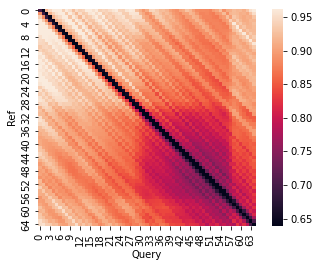

[[0.69903994 0.6361381  0.91595596 ... 0.9282574  0.9530861  0.9653122 ]
 [0.8879849  0.6897176  0.6381199  ... 0.90668786 0.92797244 0.95097446]
 [0.93716085 0.8851693  0.6821592  ... 0.9135218  0.91096586 0.92940956]
 ...
 [0.9326988  0.9257143  0.9060008  ... 0.45077565 0.69604003 0.7738703 ]
 [0.9499568  0.93497807 0.92775893 ... 0.6957846  0.45378813 0.70393795]
 [0.9492734  0.9539957  0.93626845 ... 0.78488976 0.6993502  0.45949885]]


In [190]:
dMat_inverted = dMat

dMat_scaled = (dMat_inverted.copy())
# dMat_scaled[dMat_scaled < 0.95] = 0.95

# GetMatchInds
# each element in mInds is the ft_ref index with the minimum distance to
# that ft_qry corresponding to its index im the mInds array
topK = 1

mInds = np.argsort(dMat_inverted, axis=0)[:topK]  # shape: K x ft_qry.shape[0]

sns.heatmap(dMat_scaled, robust=True, square=True, cbar=True)
# plt.show()
# sns.heatmap(np.log(dMat_scaled), robust=True)
plt.ylabel('Ref')
plt.xlabel('Query')
plt.show()
print(dMat_scaled)


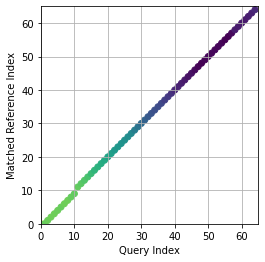

In [191]:

Inds_sorted = np.argsort(dMat_inverted, axis=0)  # shape: topK x ft_qry.shape[0]
dMat_sorted = np.take_along_axis(dMat_inverted, Inds_sorted, axis=0)
matchedDists = dMat_sorted[0]
matchedInds = Inds_sorted[0]
queryInds = np.array(range(0, len(matchedInds)))
colourVec = np.abs(matchedDists.reshape(1, -1) / matchedInds.max())
plt.scatter(queryInds, matchedInds, c=colourVec)
# plt.plot(queryInds, matchedInds)
plt.xlabel('Query Index')
plt.ylabel('Matched Reference Index')
plt.axis('square')
plt.xlim([0, len(matchedInds)])
plt.ylim([0, len(matchedInds)])
plt.grid()
plt.show()



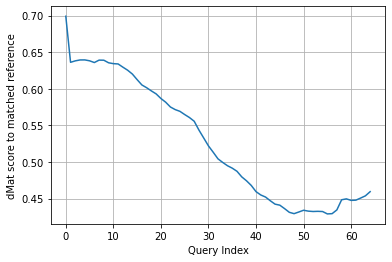

Max distance:0.69903994 (Query: [0])
Min distance:0.4291142 (Query: [55])


In [192]:
plt.plot(matchedDists)
plt.grid()
plt.xlabel('Query Index')
plt.ylabel('dMat score to matched reference')
plt.show()

print("Max distance:" + str(np.max(matchedDists)) + " (Query: " + str(
    queryInds[matchedDists == np.max(matchedDists)]) + ")")
print("Min distance:" + str(np.min(matchedDists)) + " (Query: " + str(
    queryInds[matchedDists == np.min(matchedDists)]) + ")")



Recall: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0. 

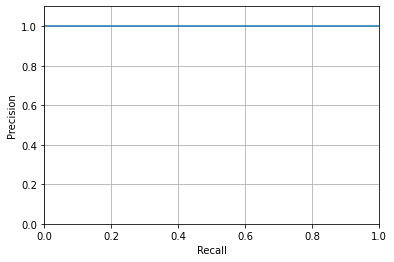

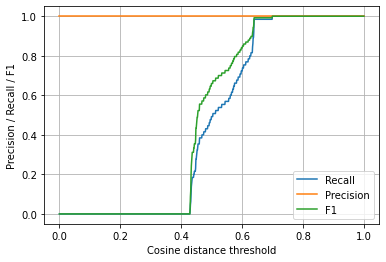

Precision@100%Recall: 1.0
Recall@100%Precision: 1.0
AUC: 1.0
Incorrect Matched Queries: []


In [193]:
GT_thresh = 2

numImages = dMat_sorted.shape[0]
qry_indices = range(numImages)
ind_Delta = abs(qry_indices - matchedInds)
true_match = ind_Delta <= GT_thresh
dist_cutoffs = np.linspace(0, 1, 1000)  # .reshape((1000,1))
recall_vec = []
precision_vec = []
for dist_thresh in dist_cutoffs:
    true_est = matchedDists <= dist_thresh
    TP = 0
    FP = 0
    FN = 0
    for i in range(len(true_match)):
        if true_est[i] and true_match[i]:
            TP += 1
        elif true_est[i] and not true_match[i]:
            FP += 1
        elif true_match[i] and not true_est[i]:
            FN += 1

    if TP + FN == 0:
        recall = 1
    else:
        recall = TP / (TP + FN)

    if TP + FP == 0:
        precision = 1
    else:
        precision = TP / (TP + FP)

    recall_vec = np.append(recall_vec, recall)
    precision_vec = np.append(precision_vec, precision)

F1 = 2 * recall_vec * precision_vec / (precision_vec + recall_vec)

# print('Recall: ' + str(recall_vec))
# print('Precision: ' + str(precision_vec))
plt.plot(recall_vec, precision_vec)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0, 1.1])
plt.xlim([0, 1])
plt.grid()
plt.show()

# print(dist_cutoffs.shape)
# print(recall_vec.shape)
plt.plot(dist_cutoffs, recall_vec)
plt.plot(dist_cutoffs, precision_vec)
plt.plot(dist_cutoffs, F1)
plt.xlabel('Cosine distance threshold')
plt.ylabel('Precision / Recall / F1')
plt.legend(['Recall', 'Precision', 'F1'])
plt.grid()
plt.show()

print("Precision@100%Recall: " + str(precision_vec[-1]))
print("Recall@100%Precision: " + str(recall_vec[precision_vec == 1][-1]))
AUC = np.trapz(precision_vec, recall_vec)
print("AUC: " + str(AUC))
print("Incorrect Matched Queries: " + str(np.array(qry_indices)[~true_match]))
# print(true_match)



In [194]:
# def change_dir(imgList, data_dir):
#     imgList_local_dir = []
#     for i in range(len(imgList)):
#         imgList_split = imgList[i].split('/')
#         image_local_dir = data_dir + imgList_split[-1]
#         # print(image_local_dir)
#         imgList_local_dir.append(image_local_dir)
#     return imgList_local_dir


In [195]:


# imgList_qry = change_dir(imgList_qry, data_qry_dir)
# imgList_ref = change_dir(imgList_ref, data_ref_dir)
# # print(imgList_qry)

Query | Matched Reference | Ground Truth
Correct Match 



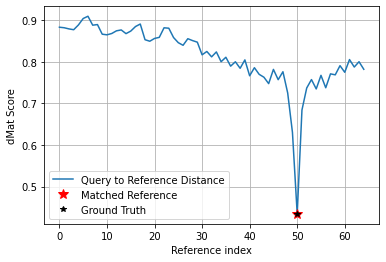

Query Index: 50
Matched Reference Index: 50
Ground Truth ranking: 0


In [196]:

qryIndex = 50

# reso = (320, 240)
print("Query | Matched Reference | Ground Truth")
# qryImg = loadImg(imgList_qry[qryIndex], reso)
# matchImg = loadImg(imgList_ref[matchedInds[qryIndex]], reso)
# gtImg = loadImg(imgList_ref[qryIndex], reso)
# plt.imshow(np.concatenate([qryImg, matchImg, gtImg], axis=1))
# plt.axis('off')
# plt.show()
if true_match[qryIndex]:
    matchstr = "Correct Match"
    print("Correct Match \n")
else:
    print("Incorrect Match \n")
    matchstr = "Incorrect Match"

match_score = dMat_inverted[:, qryIndex]
plt.plot(match_score)
plt.plot(matchedInds[qryIndex], match_score[matchedInds[qryIndex]], 'r*', markersize=10)
plt.plot(qryIndex, match_score[qryIndex], 'k*')
plt.legend(['Query to Reference Distance', 'Matched Reference', 'Ground Truth'])
plt.xlabel('Reference index')
plt.ylabel('dMat Score')
plt.grid()
plt.show()

print('Query Index: ' + str(qryIndex))
print('Matched Reference Index: ' + str(matchedInds[qryIndex]))
GT_index = np.argwhere(Inds_sorted[:, qryIndex] == qryIndex)

print('Ground Truth ranking: ' + str(GT_index[0][0]))
# print(true_est[qryIndex])
# print(true_match[qryIndex])
